In [2]:
import pandas as pd

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd

file_path = input('Path/to/file.csv:')

df = pd.read_csv(file_path)

df.head()

Path/to/file.csv: /Users/nareshchethala/Desktop/Project/Project_Dataframes/complete_edgar_data.csv


/var/folders/kk/9wmt5z851yxcb3jnsdggq1lw0000gn/T/ipykernel_24797/1235630476.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Company Name,Form Type,CIK,Date Filed,Filename
0,----------------------------------------------...,------------,------------,------------,-------------------------------------------
1,1 800 FLOWERS COM INC,10-K,1084869,2020-09-11,edgar/data/1084869/0001437749-20-019622.txt
2,1 800 FLOWERS COM INC,3,1084869,2020-07-02,edgar/data/1084869/0001437749-20-014500.txt
3,1 800 FLOWERS COM INC,4,1084869,2020-09-02,edgar/data/1084869/0001437749-20-019189.txt
4,1 800 FLOWERS COM INC,4,1084869,2020-09-02,edgar/data/1084869/0001437749-20-019193.txt


In [26]:
#Data Cleaning to remove filings with no dates
import pandas as pd

# Remove rows where 'Date Filed' contains '------------'
df = df[df['Date Filed'] != '------------']

# Now df should only contain valid dates
print(df)

                   Company Name Form Type      CIK  Date Filed  \
1         1 800 FLOWERS COM INC      10-K  1084869  2020-09-11   
2         1 800 FLOWERS COM INC         3  1084869  2020-07-02   
3         1 800 FLOWERS COM INC         4  1084869  2020-09-02   
4         1 800 FLOWERS COM INC         4  1084869  2020-09-02   
5         1 800 FLOWERS COM INC         4  1084869  2020-09-02   
...                         ...       ...      ...         ...   
23368908             ZYMETX INC         4   921439  2001-12-12   
23368909             ZYMETX INC         4   921439  2001-12-12   
23368910             ZYMETX INC   NT 10-Q   921439  2001-11-14   
23368911             ZYMETX INC      SB-2   921439  2001-12-28   
23368912       ZYMOGENETICS INC     S-1/A  1129425  2001-11-02   

                                             Filename  
1         edgar/data/1084869/0001437749-20-019622.txt  
2         edgar/data/1084869/0001437749-20-014500.txt  
3         edgar/data/1084869/0001437749

In [27]:
# Convert 'Date Filed' to datetime if it's not already
df['Date Filed'] = pd.to_datetime(df['Date Filed'])

# Extract month and year from 'Date Filed'
df['Month'] = df['Date Filed'].dt.month
df['Year'] = df['Date Filed'].dt.year
df.head()

,Company Name,Form Type,CIK,Date Filed,Filename,Month,Year
1,1 800 FLOWERS COM INC,10-K,1084869,2020-09-11,edgar/data/1084869/0001437749-20-019622.txt,9,2020
2,1 800 FLOWERS COM INC,3,1084869,2020-07-02,edgar/data/1084869/0001437749-20-014500.txt,7,2020
3,1 800 FLOWERS COM INC,4,1084869,2020-09-02,edgar/data/1084869/0001437749-20-019189.txt,9,2020
4,1 800 FLOWERS COM INC,4,1084869,2020-09-02,edgar/data/1084869/0001437749-20-019193.txt,9,2020
5,1 800 FLOWERS COM INC,4,1084869,2020-09-02,edgar/data/1084869/0001437749-20-019199.txt,9,2020


In [38]:
#Creating a dictionary for month names and mapping them to create a new column
month_names = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
df['Month_Name'] = df['Month'].map(month_names)
df.head()

,Company Name,Form Type,CIK,Date Filed,Filename,Month,Year,Month_Name
1,1 800 FLOWERS COM INC,10-K,1084869,2020-09-11,edgar/data/1084869/0001437749-20-019622.txt,9,2020,Sept
2,1 800 FLOWERS COM INC,3,1084869,2020-07-02,edgar/data/1084869/0001437749-20-014500.txt,7,2020,Jul
3,1 800 FLOWERS COM INC,4,1084869,2020-09-02,edgar/data/1084869/0001437749-20-019189.txt,9,2020,Sept
4,1 800 FLOWERS COM INC,4,1084869,2020-09-02,edgar/data/1084869/0001437749-20-019193.txt,9,2020,Sept
5,1 800 FLOWERS COM INC,4,1084869,2020-09-02,edgar/data/1084869/0001437749-20-019199.txt,9,2020,Sept


In [7]:
#getting summary of each column
df['Form Type'].describe()

count     23368913
unique         724
top              4
freq       8516229
Name: Form Type, dtype: object

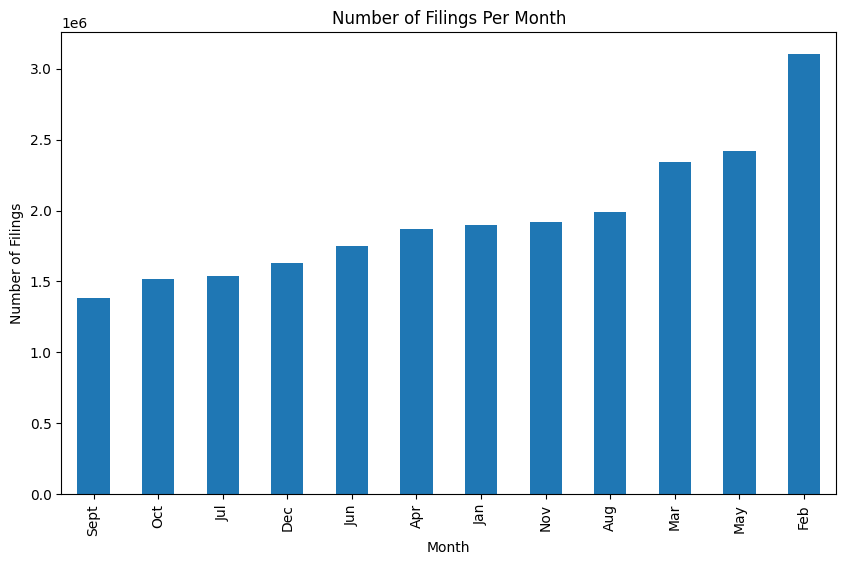

In [39]:
# Count filings per month
monthly_filings = df.groupby('Month_Name').size()

# Sort counts in ascending order
monthly_filings_sorted = monthly_filings.sort_values()

# Plotting the results
plt.figure(figsize=(10, 6))
monthly_filings_sorted.plot(kind='bar')
plt.title('Number of Filings Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Filings')
plt.show()

In [40]:
import pandas as pd

# User input for form type
user_form_type = input("Enter the form type you are interested in (e.g., 10-K, 10-Q): ")

# Filter DataFrame for the specific form type
filtered_df = df[df['Form Type'] == user_form_type]

if not filtered_df.empty:
    # Function to find the month with the most filings
    most_frequent_month = filtered_df['Month_Name'].value_counts().idxmax() 
    #idmax is used to get the first one in the list based on index i.e., Month_Name

    print(f"The month with the most filings for {user_form_type} is: {most_frequent_month}")
else:
    print(f"No filings found for form type '{user_form_type}'.")

Enter the form type you are interested in (e.g., 10-K, 10-Q):  4


The month with the most filings for 4 is: Feb


Enter the form type you are interested in (e.g., 10-K, 10-Q):  4


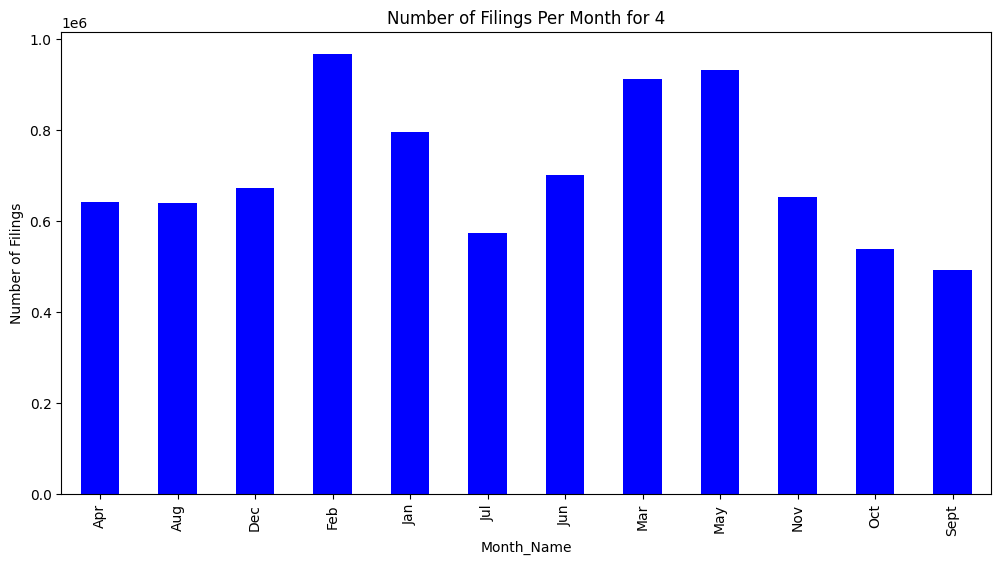

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# User input for form type
user_form_type = input("Enter the form type you are interested in (e.g., 10-K, 10-Q): ")

# Filter DataFrame for the specific form type
filtered_df = df[df['Form Type'] == user_form_type]

if not filtered_df.empty:
    # Count the number of filings per month
    filings_per_month = filtered_df.groupby('Month_Name').size()

    # Plotting the results
    plt.figure(figsize=(12, 6))
    filings_per_month.plot(kind='bar', color='blue')
    plt.title(f'Number of Filings Per Month for {user_form_type}')
    plt.xlabel('Month_Name')
    plt.ylabel('Number of Filings')
    plt.show()
else:
    print(f"No filings found for form type '{user_form_type}'.")


In [ ]:
# Calculating different statistics
mean_value = df['Form Type'].mean()
median_value = df['Form Type'].median()
std_dev = df['Form Type'].std()
min_value = df['Form Type'].min()
max_value = df['Form Type'].max()

# Printing the statistics
print(f"Mean (Average): {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")

# Getting a summary of statistics
summary = df['Form Type'].describe()
print("\nSummary Statistics:")
print(summary)

In [9]:
df_form_list = df['Form Type'].unique().tolist()

In [10]:
# Assuming 'extracted_list' is your list from the DataFrame
# Specify the file path where you want to save the list

file_path = input('/Path/to/save/form_list.txt:')

# Writing the list to a text file
with open(file_path, 'w') as file:
    for item in df_form_list:
        file.write(f"{item}\n")

print(f"List saved to {file_path}")


List saved to /Users/nareshchethala/Desktop/Project/Project_Dataframes/form_list.txt


In [13]:
import matplotlib.pyplot as plt
dfcount = df['Form Type'].value_counts()
dfcount

Form Type
4            8516229
8-K          1869862
SC 13G/A      818930
3             772883
10-Q          657499
              ...   
NT 10-D/A          1
PREA14C            1
10-M               1
40-8FC/A           1
10-QSB/A           1
Name: count, Length: 724, dtype: int64

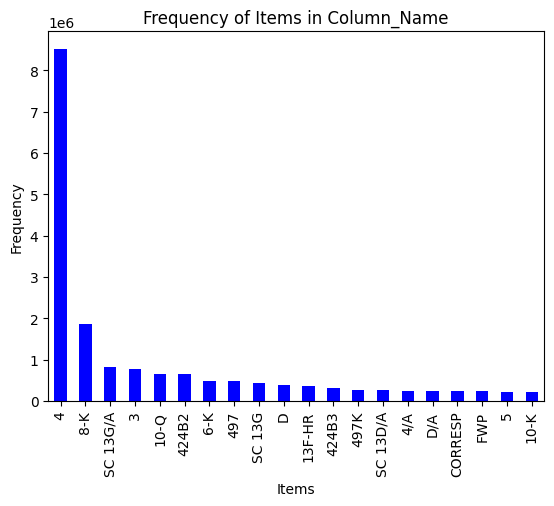

In [44]:
dfcount[0:20].plot(kind = 'bar', color ='blue')
plt.title('Frequency of Items in Column_Name')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()